## Network Data

This notebook walks us through dealing with different kinds of networks data and how to create representations of them which we can later use for ML algorithms. We will also be going through some basic analysis we can do on networks and statistics we can pass to different models. 

In [1]:
import numpy as np
import networkx as nx

We mentioned that graphs are a way to represent connections between entities. From a mathematical perspective, this can be a set, one with information of the entities and the other with information on the edges (connections). It can also be a matrix, where each node is both a row and column, and the intersection of row, column indicates a connection between the two entities. Luckily, both of these are easy to translate into a computational perspective. Let's try it out.

In [2]:
G = nx.Graph()

So now we have an empty graph object. In networkx we can add nodes and edges easily, and also convert this into a numpy matrix representation.

In [3]:
# adding one at a time
G.add_node(1)

In [5]:
# adding a list 
G.add_nodes_from([2, 4])

In [7]:
G.nodes()

NodeView((1, 2, 4))

In [8]:
# we can add edges / connection
G.add_edge(1, 2)

In [9]:
# list of edges
G.add_edges_from([(1, 4), (2, 4)])

In [10]:
G.edges()

EdgeView([(1, 2), (1, 4), (2, 4)])

In [18]:
G[1][2]['weight'] = 2

In [19]:
nx.to_numpy_matrix(G)

matrix([[0., 2., 1.],
        [2., 0., 1.],
        [1., 1., 0.]])

So we see how each of the nodes here are one a column, and the values in the matrix represent the weights. Networkx also lets us draw the matrix.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

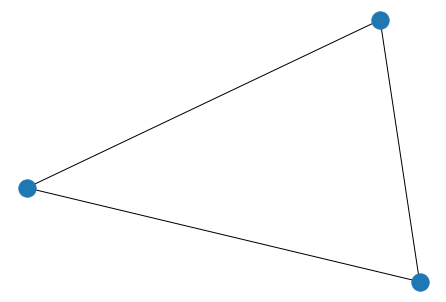

In [21]:
nx.draw(G)

Networkx also lets you convert graphs to and from pandas, numpy, lists, dictionaries.. and so on. We highly recommend you check out for a full list of the functions which help you do this converting: https://networkx.org/documentation/stable//reference/convert.html

This means we can manipulate graphs in many ways and in different data formats. 
Another way to play with graphs is generate graphs from random processes, or load graphs which are already created by others. Let's check both out!

In [29]:
random_graph = nx.fast_gnp_random_graph(n=15, p=0.5)

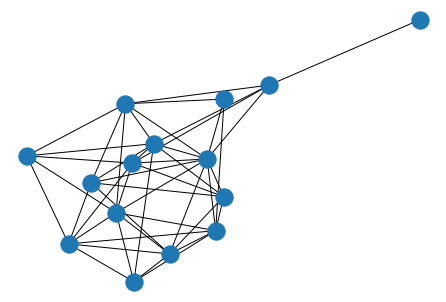

In [30]:
nx.draw(random_graph)

There are also a couple of popular, small networks which are created through different kinds of data collection - in this case, it is an anthropological study. 

Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.

In [31]:
karate_club_graph = nx.karate_club_graph()

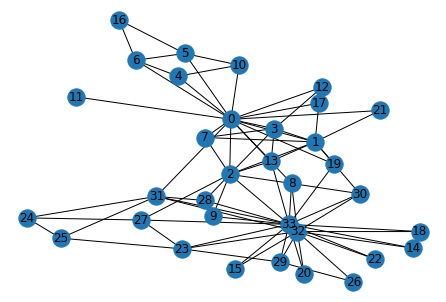

In [50]:
nx.draw(karate_club_graph, with_labels=True)

In [57]:
nx.to_numpy_matrix(karate_club_graph)

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

Some common tasks involving networks includes link prediction, or node classification. Often for these kinds of tasks, certain network features are useful. Networkx has a full suite of network related algorithms: https://networkx.org/documentation/stable/reference/algorithms/index.html

Let's see one such example with degree centrality, which is a measure of how central different nodes are as a function of the number of edges associated with it.

In [44]:
nx.degree_centrality(karate_club_graph)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

Network science is a huge field strongly associated with data science - we encourage you to explore it even outside the context of machine learning and deep learning. 

While we'll look at deep learning for graphs in more detail on the dedicated chapter to it, let's whip up a few basic graph based embeddings to see what they say!

In [45]:
from node2vec import Node2Vec

In [46]:
node2vec = Node2Vec(karate_club_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

In [47]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [51]:
model.wv.get_vector('0')

array([ 0.07576907, -0.20822656,  0.26895764,  0.2223944 ,  0.07887661,
        0.02305445, -0.29409474,  0.17381258,  0.19319335,  0.6209059 ,
        0.18926463, -0.01807818,  0.27735516, -0.57139987, -0.09343442,
       -0.13896947, -0.20759298, -0.26762795, -0.5396526 , -0.04850095,
        0.62100965, -0.48654655,  0.22412188, -0.87080586,  0.5701015 ,
        0.06249369,  0.00318991,  0.40213564, -0.12657039,  0.01132575,
        0.11818053, -0.04296247, -0.6491045 ,  0.17841189,  0.51176983,
        0.8057588 ,  0.502168  ,  0.03579383, -0.03114121,  0.55986094,
       -0.56745094,  0.11876268,  0.8669776 , -0.03290798,  0.28044435,
       -0.01358384,  0.0802939 ,  0.01847011,  0.7877766 , -0.4770601 ,
       -0.12390647,  0.6147396 , -0.3655435 ,  0.49049205,  0.17169482,
        0.09625159, -0.6805405 , -0.11029188, -0.8162182 , -0.4016616 ,
        0.3414141 , -0.09261975, -0.21667351,  0.04802998], dtype=float32)

In [48]:
model.wv.most_similar('0')

[('11', 0.7567460536956787),
 ('4', 0.7270371913909912),
 ('10', 0.7010830640792847),
 ('5', 0.6993977427482605),
 ('6', 0.655333936214447),
 ('21', 0.6075923442840576),
 ('12', 0.6005926132202148),
 ('17', 0.5878965854644775),
 ('16', 0.5757728219032288),
 ('1', 0.5341503024101257)]

In [49]:
model.wv.most_similar('33')

[('32', 0.8861551284790039),
 ('20', 0.8134798407554626),
 ('15', 0.7881580591201782),
 ('14', 0.7761279940605164),
 ('22', 0.7493255138397217),
 ('18', 0.7462480664253235),
 ('29', 0.6742403507232666),
 ('26', 0.6508331298828125),
 ('30', 0.5419887900352478),
 ('23', 0.4835788607597351)]

Take some time to interpret the closest nodes based on the node2vec embedding  - what aspect of similarity is best captured? 

the node2vec package also includes edge embeddings, via the Hadamard Embedder.

In [52]:
from node2vec.edges import HadamardEmbedder

In [53]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [54]:
edges_embs[('24', '25')]

array([ 1.69293843e-02,  3.96484077e-01,  2.42100731e-02,  1.07435799e+00,
        6.04034364e-01,  7.27966487e-01,  1.87039182e-01, -2.38812971e-03,
        4.81802896e-02,  2.68648416e-01,  2.34375402e-01,  1.61104560e-01,
       -3.95314116e-03, -6.90719672e-03,  7.07196236e-01,  1.56349862e+00,
        2.33380103e+00,  5.92025101e-01,  6.93901479e-02,  8.14287516e-04,
        7.67187625e-02,  6.99606910e-02,  2.72140145e-01,  1.38130644e-02,
        5.58899790e-02,  1.03963101e-02,  4.40828055e-01,  4.77118164e-01,
        5.95820881e-02,  2.11344272e-01,  1.50251016e-01,  4.71724570e-01,
        3.79690319e-01,  1.59947556e-02,  5.49500994e-02,  1.17627762e-01,
        7.03342445e-03,  2.46024020e-02,  9.77198064e-01,  9.24595177e-01,
        9.42043066e-02,  1.67871304e-02, -2.78428569e-03,  7.15311021e-02,
        9.05360281e-01,  4.71719295e-01,  1.01568294e+00,  7.37125397e-01,
        4.11204755e-01,  8.70581686e-01,  1.60666659e-01, -1.78737147e-03,
       -1.87622309e-02, -

In [55]:
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|██████████| 595/595.0 [00:00<00:00, 18338.75it/s]


In [56]:
edges_kv.most_similar(str(('24', '25')))

[("('24', '24')", 0.9898285865783691),
 ("('25', '25')", 0.9884214401245117),
 ("('24', '31')", 0.9575783014297485),
 ("('24', '27')", 0.950434684753418),
 ("('25', '31')", 0.9470213651657104),
 ("('25', '27')", 0.9442646503448486),
 ("('27', '31')", 0.9042643308639526),
 ("('23', '24')", 0.8907970190048218),
 ("('23', '25')", 0.8828089833259583),
 ("('23', '31')", 0.8477760553359985)]

These node and edge embeddings can be used for a series of other downstream tasks. node2vec serves as a useful way to quickly prototype these alternate approaches to representing a network or graph. It's also possible to embed an entire graph, and then we can measure between two different graphs. Graph Neural Network models also help you perform a series of tasks on graphs such as community detection and link prediction. We'll be seeing this in more detail in later chapters, but hopefully this gave you an idea on the different graph representations out there!